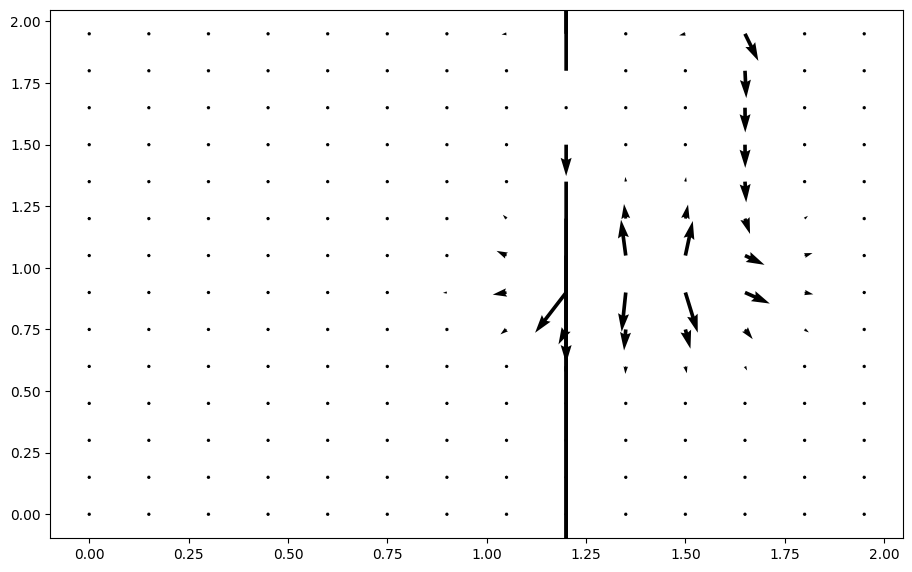

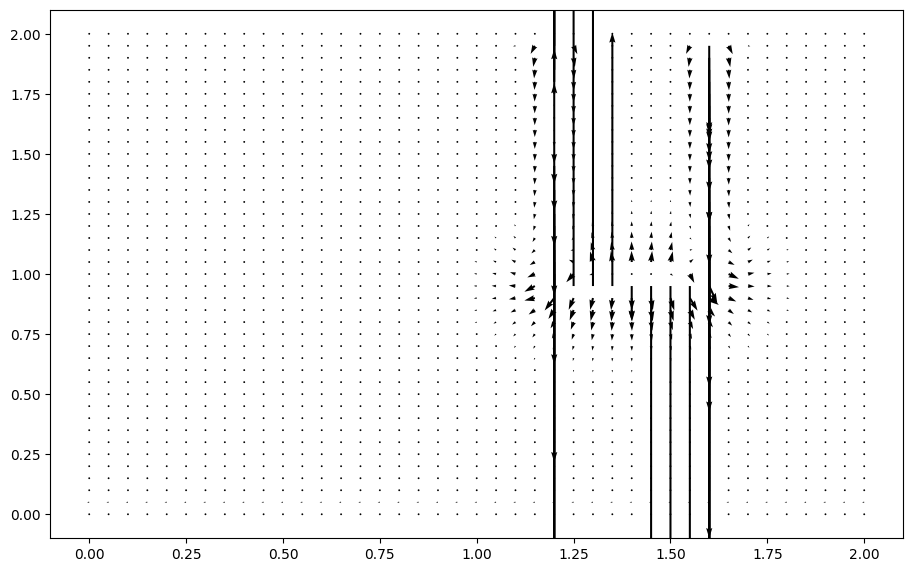

In [ ]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

def build_up_b(rho, dt, dx, dy, u, v):
    b = numpy.zeros_like(u)
    b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) +
                                      (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                            ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                            2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                                 (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                            ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    
    # Periodic BC Pressure @ x = 2
    b[1:-1, -1] = (rho * (1 / dt * ((u[1:-1, 0] - u[1:-1,-2]) / (2 * dx) +
                                    (v[2:, -1] - v[0:-2, -1]) / (2 * dy)) -
                          ((u[1:-1, 0] - u[1:-1, -2]) / (2 * dx))**2 -
                          2 * ((u[2:, -1] - u[0:-2, -1]) / (2 * dy) *
                               (v[1:-1, 0] - v[1:-1, -2]) / (2 * dx)) -
                          ((v[2:, -1] - v[0:-2, -1]) / (2 * dy))**2))

    # Periodic BC Pressure @ x = 0
    b[1:-1, 0] = (rho * (1 / dt * ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx) +
                                   (v[2:, 0] - v[0:-2, 0]) / (2 * dy)) -
                         ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx))**2 -
                         2 * ((u[2:, 0] - u[0:-2, 0]) / (2 * dy) *
                              (v[1:-1, 1] - v[1:-1, -1]) / (2 * dx))-
                         ((v[2:, 0] - v[0:-2, 0]) / (2 * dy))**2))
    
    return b

def pressure_poisson_periodic(p, dx, dy):
    pn = numpy.empty_like(p)
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 +
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                         (2 * (dx**2 + dy**2)) -
                         dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 1:-1])

        # Periodic BC Pressure @ x = 2
        p[1:-1, -1] = (((pn[1:-1, 0] + pn[1:-1, -2])* dy**2 +
                        (pn[2:, -1] + pn[0:-2, -1]) * dx**2) /
                       (2 * (dx**2 + dy**2)) -
                       dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, -1])

        # Periodic BC Pressure @ x = 0
        p[1:-1, 0] = (((pn[1:-1, 1] + pn[1:-1, -1])* dy**2 +
                       (pn[2:, 0] + pn[0:-2, 0]) * dx**2) /
                      (2 * (dx**2 + dy**2)) -
                      dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * b[1:-1, 0])
        
        # Wall boundary conditions, pressure
        p[-1, :] =p[-2, :]  # dp/dy = 0 at y = 2
        p[0, :] = p[1, :]  # dp/dy = 0 at y = 0
    
    return p

##variable declarations
nx = 41
ny = 41
nt = 10
nit = 50 
c = 1
xmin=0
xmax=2
ymin=0
ymax=2
dx = (xmax-xmin) / (nx - 1)
dy = (ymax-ymin) / (ny - 1)
x = numpy.linspace(xmin, xmax, nx)
y = numpy.linspace(ymin, ymax, ny)
X, Y = numpy.meshgrid(x, y)

inicioVigaX = int((3/5) * nx )
finalVigaX = int((4/5) * nx) 
inicioVigaY = int(0.5 * ny)
finalVigaY = int(ny-1)


##physical variables
rho = .1
nu = .1
F = 1
dt = .1

#initial conditions
u = numpy.zeros((ny, nx))
un = numpy.zeros((ny, nx))

v = numpy.zeros((ny, nx))
vn = numpy.zeros((ny, nx))

p = numpy.ones((ny, nx))
pn = numpy.ones((ny, nx))

b = numpy.zeros((ny, nx))

udiff = 1
stepcount = 0

#Inlet
u[:, 0] = u[:, 1]
v[:, 0] = 0
#Outlet H
u[:, -1] = u[:, -2]
v[:, -1] = v[:, -2]
#Surface G
u[0, :] = 1 #* u[1: ]
v[0, :] = 0
#Línea central EA
u[-1, :] = 0
v[-1, :] = 0
#Lado B
u[inicioVigaY: , finalVigaX] = 0
v[inicioVigaY: , finalVigaX] = -2*(u[inicioVigaY:, finalVigaX+1]-u[inicioVigaY: , finalVigaX])/(dt**2)
#Lado D
u[inicioVigaY: , inicioVigaX] = 0
v[inicioVigaY: , inicioVigaX] = -2*(u[inicioVigaY:, finalVigaX-1]-u[inicioVigaY: , finalVigaX])/(dt**2)
#Lado C
u[inicioVigaY-1, inicioVigaX:finalVigaX] = 0
v[inicioVigaY-1, inicioVigaX:finalVigaX] = -2*(u[inicioVigaY-2, inicioVigaX:finalVigaX]-u[inicioVigaY-1, inicioVigaX:finalVigaX])/(dt**2)



    
while udiff > .01:
    un = u.copy()
    vn = v.copy()

    b = build_up_b(rho, dt, dx, dy, u, v)
    p = pressure_poisson_periodic(p, dx, dy)

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * 
                    (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * 
                    (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                     dt / (2 * rho * dx) * 
                    (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                     nu * (dt / dx**2 * 
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                     dt / dy**2 * 
                    (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])) + 
                     F * dt)

    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                     un[1:-1, 1:-1] * dt / dx * 
                    (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     vn[1:-1, 1:-1] * dt / dy * 
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                     dt / (2 * rho * dy) * 
                    (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                     nu * (dt / dx**2 *
                    (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     dt / dy**2 * 
                    (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

    # Periodic BC u @ x = 2     
    # u[1:-1, -1] = (un[1:-1, -1] - un[1:-1, -1] * dt / dx * 
    #               (un[1:-1, -1] - un[1:-1, -2]) -
    #                vn[1:-1, -1] * dt / dy * 
    #               (un[1:-1, -1] - un[0:-2, -1]) -
    #                dt / (2 * rho * dx) *
    #               (p[1:-1, 0] - p[1:-1, -2]) + 
    #                nu * (dt / dx**2 * 
    #               (un[1:-1, 0] - 2 * un[1:-1,-1] + un[1:-1, -2]) +
    #                dt / dy**2 * 
    #               (un[2:, -1] - 2 * un[1:-1, -1] + un[0:-2, -1])) + F * dt)

    # # Periodic BC u @ x = 0
    # u[1:-1, 0] = (un[1:-1, 0] - un[1:-1, 0] * dt / dx *
    #              (un[1:-1, 0] - un[1:-1, -1]) -
    #               vn[1:-1, 0] * dt / dy * 
    #              (un[1:-1, 0] - un[0:-2, 0]) - 
    #               dt / (2 * rho * dx) * 
    #              (p[1:-1, 1] - p[1:-1, -1]) + 
    #               nu * (dt / dx**2 * 
    #              (un[1:-1, 1] - 2 * un[1:-1, 0] + un[1:-1, -1]) +
    #               dt / dy**2 *
    #              (un[2:, 0] - 2 * un[1:-1, 0] + un[0:-2, 0])) + F * dt)

    # # Periodic BC v @ x = 2
    # v[1:-1, -1] = (vn[1:-1, -1] - un[1:-1, -1] * dt / dx *
    #               (vn[1:-1, -1] - vn[1:-1, -2]) - 
    #                vn[1:-1, -1] * dt / dy *
    #               (vn[1:-1, -1] - vn[0:-2, -1]) -
    #                dt / (2 * rho * dy) * 
    #               (p[2:, -1] - p[0:-2, -1]) +
    #                nu * (dt / dx**2 *
    #               (vn[1:-1, 0] - 2 * vn[1:-1, -1] + vn[1:-1, -2]) +
    #                dt / dy**2 *
    #               (vn[2:, -1] - 2 * vn[1:-1, -1] + vn[0:-2, -1])))

    # # Periodic BC v @ x = 0
    # v[1:-1, 0] = (vn[1:-1, 0] - un[1:-1, 0] * dt / dx *
    #              (vn[1:-1, 0] - vn[1:-1, -1]) -
    #               vn[1:-1, 0] * dt / dy *
    #              (vn[1:-1, 0] - vn[0:-2, 0]) -
    #               dt / (2 * rho * dy) * 
    #              (p[2:, 0] - p[0:-2, 0]) +
    #               nu * (dt / dx**2 * 
    #              (vn[1:-1, 1] - 2 * vn[1:-1, 0] + vn[1:-1, -1]) +
    #               dt / dy**2 * 
    #              (vn[2:, 0] - 2 * vn[1:-1, 0] + vn[0:-2, 0])))


    #Inlet
    u[:, 0] = u[:, 1]
    v[:, 0] = 0
    #Outlet H
    u[:, -1] = u[:, -2]
    v[:, -1] = v[:, -2]
    #Surface G
    u[0, :] = 1 #* u[1: ]
    v[0, :] = 0
    #Línea central EA
    u[-1, :] = 0
    v[-1, :] = 0
    #Lado B
    u[inicioVigaY: , finalVigaX] = 0
    v[inicioVigaY: , finalVigaX] = -2*(u[inicioVigaY:, finalVigaX+1]-u[inicioVigaY: , finalVigaX])/(dt**2)
    #Lado D
    u[inicioVigaY: , inicioVigaX] = 0
    v[inicioVigaY: , inicioVigaX] = -2*(u[inicioVigaY:, finalVigaX-1]-u[inicioVigaY: , finalVigaX])/(dt**2)
    #Lado C
    u[inicioVigaY-1, inicioVigaX:finalVigaX] = 0
    v[inicioVigaY-1, inicioVigaX:finalVigaX] = -2*(u[inicioVigaY-2, inicioVigaX:finalVigaX]-u[inicioVigaY-1, inicioVigaX:finalVigaX])/(dt**2)
        
    udiff = (numpy.sum(u) - numpy.sum(un)) / numpy.sum(u)
    stepcount += 1

def plot():
    fig = pyplot.figure(figsize = (11,7), dpi=100)
    pyplot.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3]);

    fig = pyplot.figure(figsize = (11,7), dpi=100)
    pyplot.quiver(X, Y, u, v)

plot()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09c38f6a-ca5d-4494-bbde-d245b4951523' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>